# Monte Carlo DM
    This Notebook generates a random ensemble of DM_FRB for a set of random redshifts

In [5]:
%matplotlib notebook

In [88]:
# import
from importlib import reload
import numpy as np
from scipy import interpolate

from matplotlib import pyplot as plt

from frb.dm import prob_dmz
from frb.dm import igm

# Random redshifts

## Here taken to be uniform from 0.1 to 1 ::  $\mathcal{U}(0.1, 1.)$

In [109]:
N_FRB = 1000
randz = 0.1 + 0.9 * np.random.rand(N_FRB)

<IPython.core.display.Javascript object>


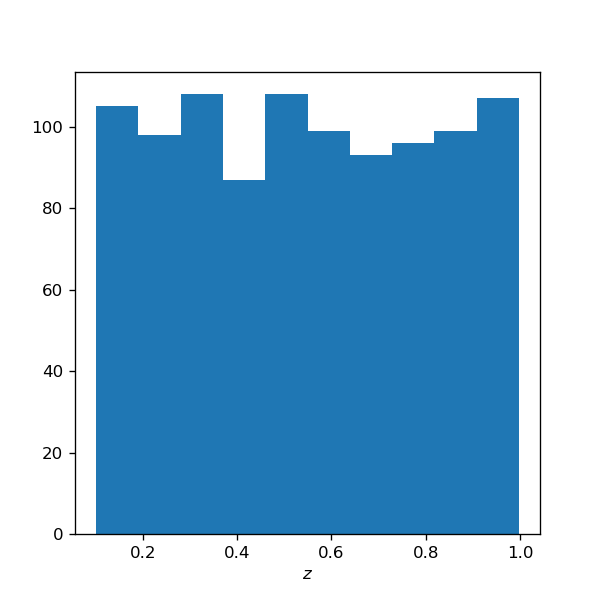

In [10]:
fig = plt.figure(figsize=(5, 5))

ax = plt.gca()
ax.hist(randz)
#
ax.set_xlabel(r'$z$')
plt.show()

# Generate PDF grid

In [12]:
zvals = np.linspace(0.1, 1., 200)

In [76]:
reload(prob_dmz)

<module 'frb.dm.prob_dmz' from '/data/Projects/FRB_Software/FRB/frb/dm/prob_dmz.py'>

## Run it -- This is very slow....

In [77]:
_, DM_cosmics, PDF_grid = prob_dmz.grid_P_DMcosmic_z(zvals=zvals)

## View it

In [39]:
# log10 PDF
ok_PDF = PDF_grid > 0.
min_PDF = np.min(PDF_grid[ok_PDF])
log10_PDF = np.log10(min_PDF) * np.ones_like(PDF_grid)
log10_PDF[ok_PDF] = np.log10(PDF_grid[ok_PDF])

<IPython.core.display.Javascript object>


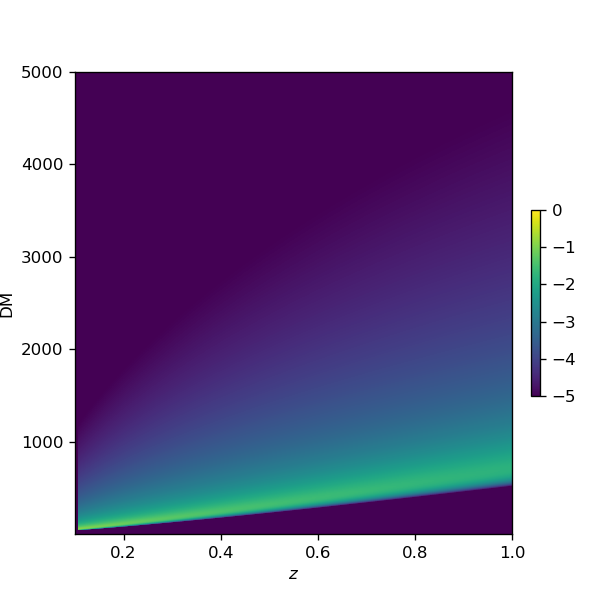

In [57]:
fig = plt.figure(figsize=(5, 5))

ax = plt.gca()
cplt = ax.imshow(log10_PDF, origin='lower', vmin=-5, vmax=0., 
                 extent=(zvals[0], zvals[-1], DM_cosmics[0], DM_cosmics[-1]),
                aspect='auto')
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#
#plt.xlim(zvals[0], zvals[-1])
#plt.ylim(DM_cosmics[0], DM_cosmics[-1])
#
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'DM')

plt.show()

# Generate CDF

In [78]:
CDF_grid = np.cumsum(PDF_grid, axis=0)
CDF_grid.shape

(1000, 200)

## Total

In [79]:
fig = plt.figure(figsize=(5, 5))

ax = plt.gca()
cplt = ax.imshow(CDF_grid, origin='lower', extent=(zvals[0], zvals[-1], DM_cosmics[0], DM_cosmics[-1]),
                 aspect='auto')
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#
#
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'DM')
#
plt.show()

<IPython.core.display.Javascript object>

## One cut

<IPython.core.display.Javascript object>


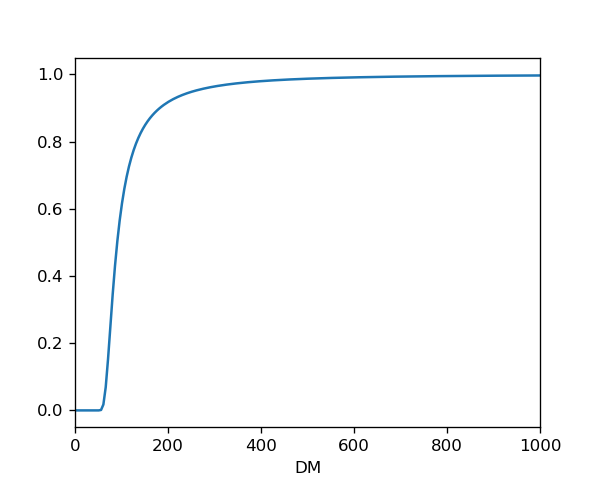

In [50]:
fig = plt.figure(figsize=(5, 4))

ax = plt.gca()
cplt = ax.plot(DM_cosmics, CDF_grid[:,10])
#cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#
plt.xlim(0., 1000.)
#plt.ylim(DM_cosmics[0], DM_cosmics[-1])
#
ax.set_xlabel(r'DM')
plt.show()

### Interpolate

In [68]:
DM_cosmics[0:20]

array([ 1.        ,  6.004004  , 11.00800801, 16.01201201, 21.01601602,
       26.02002002, 31.02402402, 36.02802803, 41.03203203, 46.03603604,
       51.04004004, 56.04404404, 61.04804805, 66.05205205, 71.05605606,
       76.06006006, 81.06406406, 86.06806807, 91.07207207, 96.07607608])

In [66]:
CDF_grid[:,10]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.04670056e-130, 2.83109428e-051,
       1.46467049e-022, 5.67737432e-011, 6.42075595e-006, 1.33812919e-003,
       1.75697750e-002, 6.90490313e-002, 1.52951967e-001, 2.50475550e-001,
       3.45762217e-001, 4.30981898e-001, 5.03971250e-001, 5.65313265e-001,
       6.16569883e-001, 6.59453941e-001, 6.95510441e-001, 7.26029879e-001,
       7.52054055e-001, 7.74411992e-001, 7.93760624e-001, 8.10621205e-001,
       8.25409152e-001, 8.38457551e-001, 8.50035326e-001, 8.60361185e-001,
       8.69614306e-001, 8.77942543e-001, 8.85468757e-001, 8.92295727e-001,
       8.98509979e-001, 9.04184800e-001, 9.09382616e-001, 9.14156893e-001,
       9.18553651e-001, 9.22612695e-001, 9.26368609e-001, 9.29851567e-001,
       9.33088003e-001, 9.36101164e-001, 9.38911564e-001, 9.41537368e-001,
       9.43994714e-001, 9.46297983e-001, 9.48460024e-001, 9.50492352e-001,
       9.52405311e-001, 9

In [64]:
f = interpolate.interp1d(CDF_grid[:,10], DM_cosmics)

In [70]:
f(1.-1e-10)

array(4999.99808504)

# Generate $\rm{DM}(x,z)$ with $x$ a random number between 0,1

## Init

In [62]:
DM_grid = np.zeros_like(CDF_grid)

## Ugly for loop

In [74]:
CDF_val = np.linspace(0., 1.-1e-10, DM_grid.shape[0])

In [80]:
for col, zval in enumerate(zvals):
    f = interpolate.interp1d(CDF_grid[:,col], DM_cosmics)
    DM_grid[:,col] = f(CDF_val)

## Show

<IPython.core.display.Javascript object>


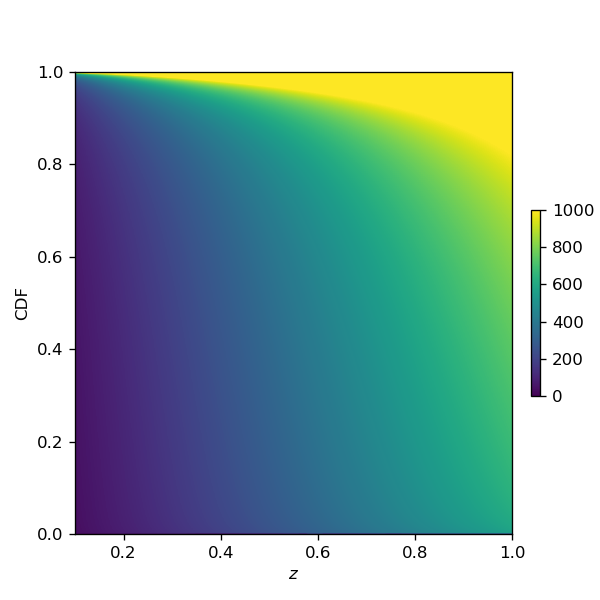

In [107]:
fig = plt.figure(figsize=(5, 5))

ax = plt.gca()
cplt = ax.imshow(DM_grid, origin='lower', extent=(zvals[0], zvals[-1], 0., 1.),
                 aspect='auto', vmin=0., vmax=1000)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#
#
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'CDF')
#
plt.show()

# 2D Interpolate

In [137]:
f2D = interpolate.RectBivariateSpline(CDF_val, zvals, DM_grid)

In [140]:
f2D.ev([0.1,0.2, 0.99, 0.3, 0.99], [0.5]*5)

array([ 288.66751832,  306.70651707, 1674.23185801,  322.96043497,
       1674.23185801])

## Save to disk

In [85]:
np.savez('DM_CDF_grid.npz', DM_grid=DM_grid, zvals=zvals, CDF_val=CDF_val, DM_cosmics=DM_cosmics)

----

# Random Macquart Relation

## Draw em

In [86]:
randx = np.random.rand(N_FRB)

In [142]:
rand_DM = f2D.ev(randx, randz)

## Average

In [89]:
DM_avg, z_avg = igm.average_DM(1., cumul=True)

In [106]:
DM_avg[-1]

<Quantity 917.63531865 pc / cm3>

## Plot

<IPython.core.display.Javascript object>


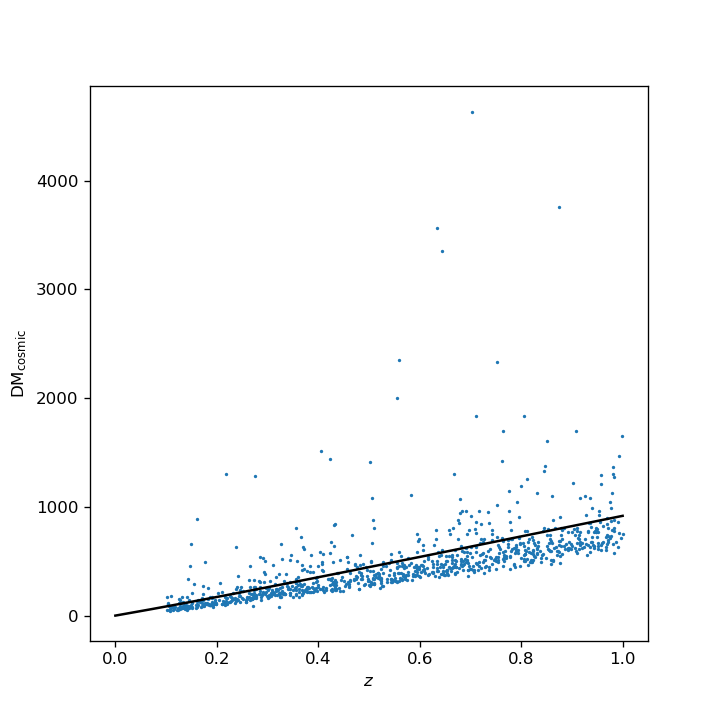

In [144]:
fig = plt.figure(figsize=(6, 6))

ax = plt.gca()
cplt = ax.plot(z_avg, DM_avg, 'k-')
#
ax.scatter(randz, rand_DM_1d, s=1)
#
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'DM$_{\rm cosmic}$')
plt.show()